# ML Bootcamp: Multiclass Least Squares

In this lab, we will provide an interactive demonstration of multiclass least squares, predicting what number is represented by handwritten images of digits 0-9.

Let's first start by loading the data in. We will use the scikit-learn digits dataset as a reference. Each piece of data consists of a representation of a handwritten digit and a label corresponding to the number of the drawn digit.

In [0]:
import numpy as np
from sklearn import datasets


digits = datasets.load_digits()
digits_X = digits.data
digits_y = digits.target

We can visualize some of the examples in our dataset.

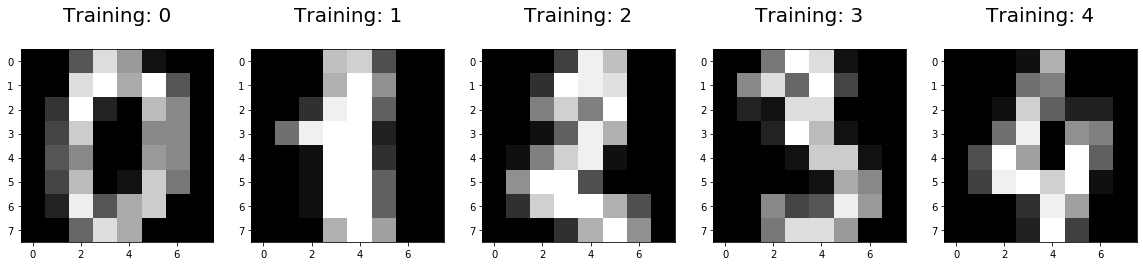

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

As we usually do in machine learning, let's separate our data into a subset to **train** on and a subset to **test** on. 

In [0]:
np.random.seed(0)
indices = np.random.permutation(len(digits_X))

# |with_ex| is the number of test examples
# Precondition: with_ex < 0
with_ex = -10

digits_X_train = digits_X[indices[:with_ex]]
digits_y_train = digits_y[indices[:with_ex]]


digits_X_test = digits_X[indices[with_ex:]]
digits_y_test = digits_y[indices[with_ex:]]
images_X_test = digits.images[indices[with_ex:]]

Now, we will use scikit-learn's implementation of linear regression. We will train our model on the training subset, and then use that model to make predictions for our test set.

Remember for multiclass classification, we make a model for every class. We have 10 classes (10 different types of digits), so we make 10 different classifiers. Each classifier will give us a score, and we predict that the image falls in the class corresponding to the classifier with the highest score. We will use a list to store all 10 classifiers. The 0th element of the list corresponds to the classifier for 0; the 9th element of the list corresponds to the classifier for 9. In the following code block, we initialize all of our models.

In [0]:
from sklearn import linear_model

models = [linear_model.LinearRegression() for i in range(10)]

After creating the linear regression models, we want to train each model on our training subset. Note that we must change the labels for our dataset to be either 1 or 0 depending on the classifier we are working with. For example, if we have an image of the handwritten digit 0, its label for classifier 0 will be 1, and its label for classifiers 1-9 will be -1.

In [0]:
# Create 10 different label sets, one for each classifier

binary_labels = []
for i in range(10):
  i_labels = np.where (digits_y_train == i, np.ones(digits_y_train.shape), -np.ones(digits_y_train.shape))
  binary_labels.append(i_labels)

Now, we can train each classifier on the training subset. For each classifier, we will train using the array of pixels and corresponding binary vector that we created in the previous cell.

In [0]:
for i in range(10):
  models[i].fit(digits_X_train, binary_labels[i])

With the trained models, we can make predictions on the testing subset. To do this, we run each classifier on each example from the test subset, and we assign the example to the classifier that returns the highest value.

In [0]:
# Make a matrix of num_test_examples by 10 to record the predictions for each
# classifier on each data point

all_preds = np.zeros((digits_X_test.shape[0], 10))

# Column i in the matrix corresponds to the predictions made by classifier i
for i in range(10):
  all_preds[:, i] = models[i].predict(digits_X_test)

# We want to save the classifier index with the highest prediction
preds = np.argmax(all_preds, axis=1)

Let's now visualize our predictions!

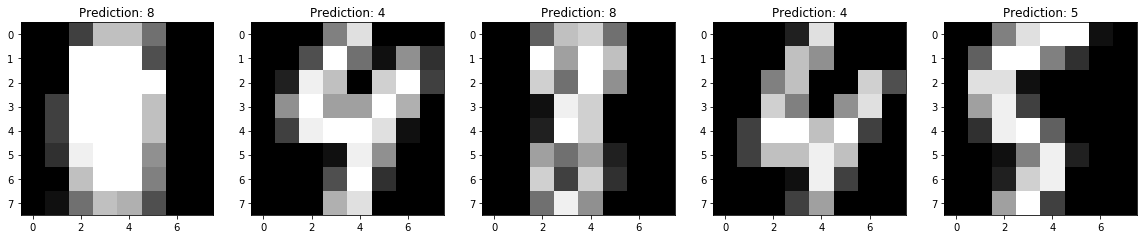

In [8]:
# Plot outputs
images_and_predictions = list(zip(images_X_test, preds))
plt.figure(figsize=(20,4))
for index, (image, prediction) in enumerate(images_and_predictions[:5]):
    plt.subplot(1, 5, index + 1)
#     plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Prediction: %i' % prediction)

plt.show()

Finally, we can compute our classification accuracy, or the percentage of examples in the test subset classified correctly. The following code snippet computes the accuracy.

In [9]:
# Compute number of examples classified correctly

num_correct = 0
for i in range(len(preds)):
  if preds[i] == digits_y_test[i]:
    num_correct += 1
    
print("The fraction of correctly classified examples in the test set is: " + str(num_correct / len(preds)))

The fraction of correctly classified examples in the test set is: 0.9


We can visualize the classification of examples in the test set with a confusion matrix. Scikit learn contains code to do this for us! Note that elements in the LR diagonal are the number of correctly classified examples. Nonzero elements that aren't in the LR diagonal tell us that there were some elements that weren't classified correctly.

In [10]:
from sklearn import metrics

print("Confusion matrix:\n%s" % metrics.confusion_matrix(digits_y_test, preds))

Confusion matrix:
[[0 0 0 0 0 1]
 [0 2 0 0 0 0]
 [0 0 2 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 2 0]
 [0 0 0 0 0 2]]
